# Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

import os
directory_path = r"d:\semester 4\machine learning\olivetti_faces.npy"
print(os.listdir(directory_path))

['olivetti_faces.npy', 'olivetti_faces_target.npy']


# Import Data

## Review Data

In [4]:
pics = np.load(r"d:\paper code\Caries")
labels = np.load(r"d:\semester 4\machine learning\olivetti_faces.npy\olivetti_faces_target.npy")

PermissionError: [Errno 13] Permission denied: 'd:\\paper code\\Caries'

In [4]:
print("pics: ", pics.shape)
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400,)


In [5]:
print("There are {} images in the dataset".format(len(pics)))
print("There are {} unique targets in the dataset".format(len(np.unique(labels))))
print("Size of each image is {}x{}".format(pics.shape[1],pics.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(pics[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [7]:
print("unique target number:",np.unique(labels))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


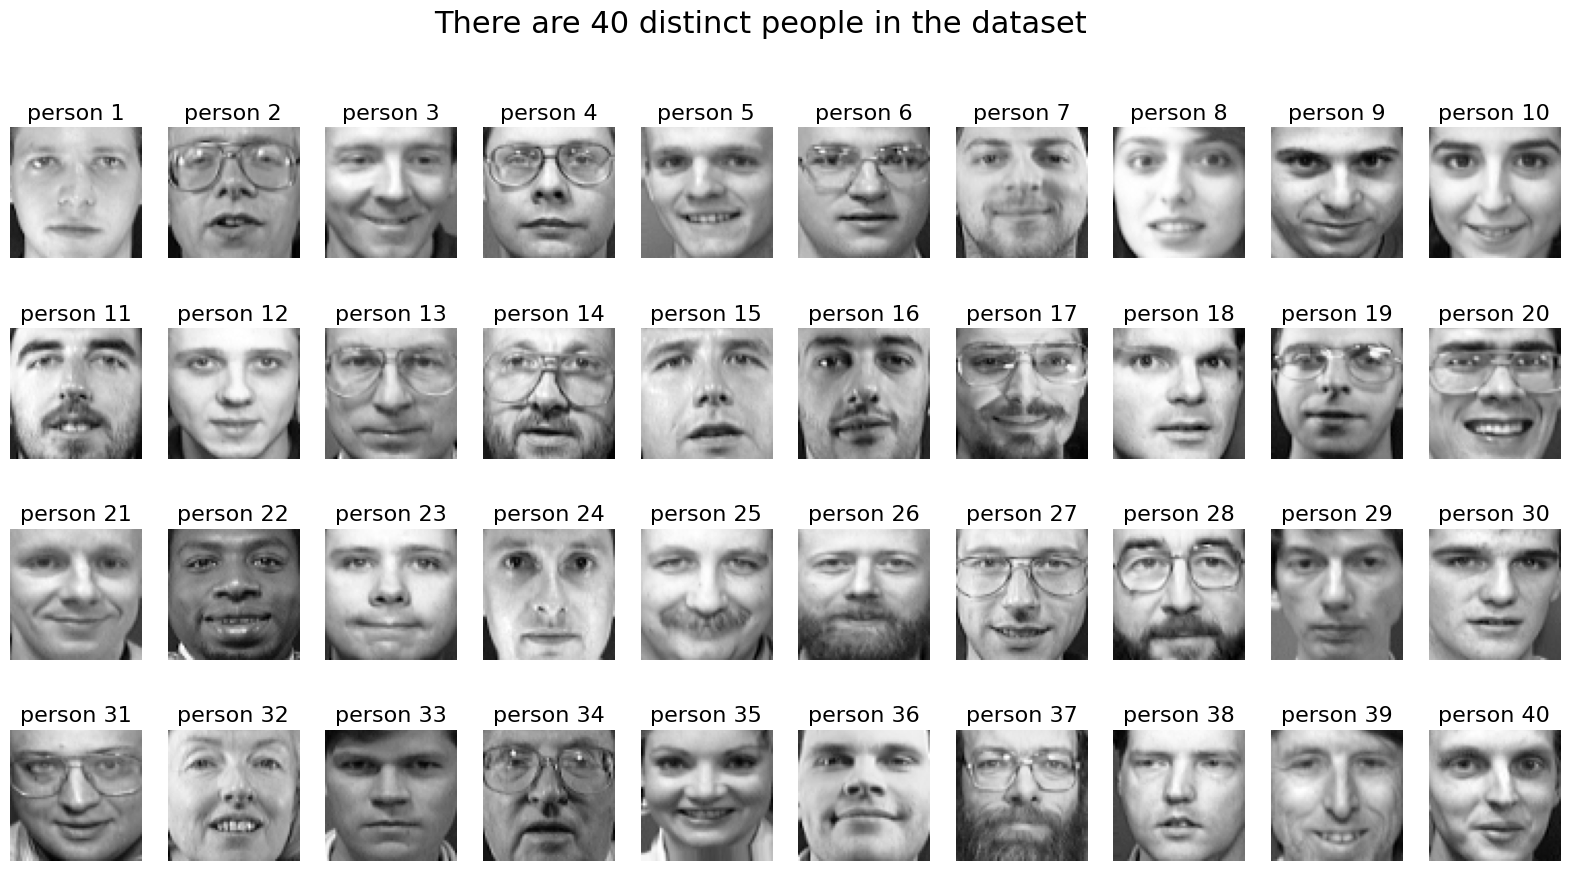

In [8]:
fig = plt.figure(figsize=(20, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=16)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct people in the dataset", fontsize=22)
plt.show()


In [7]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

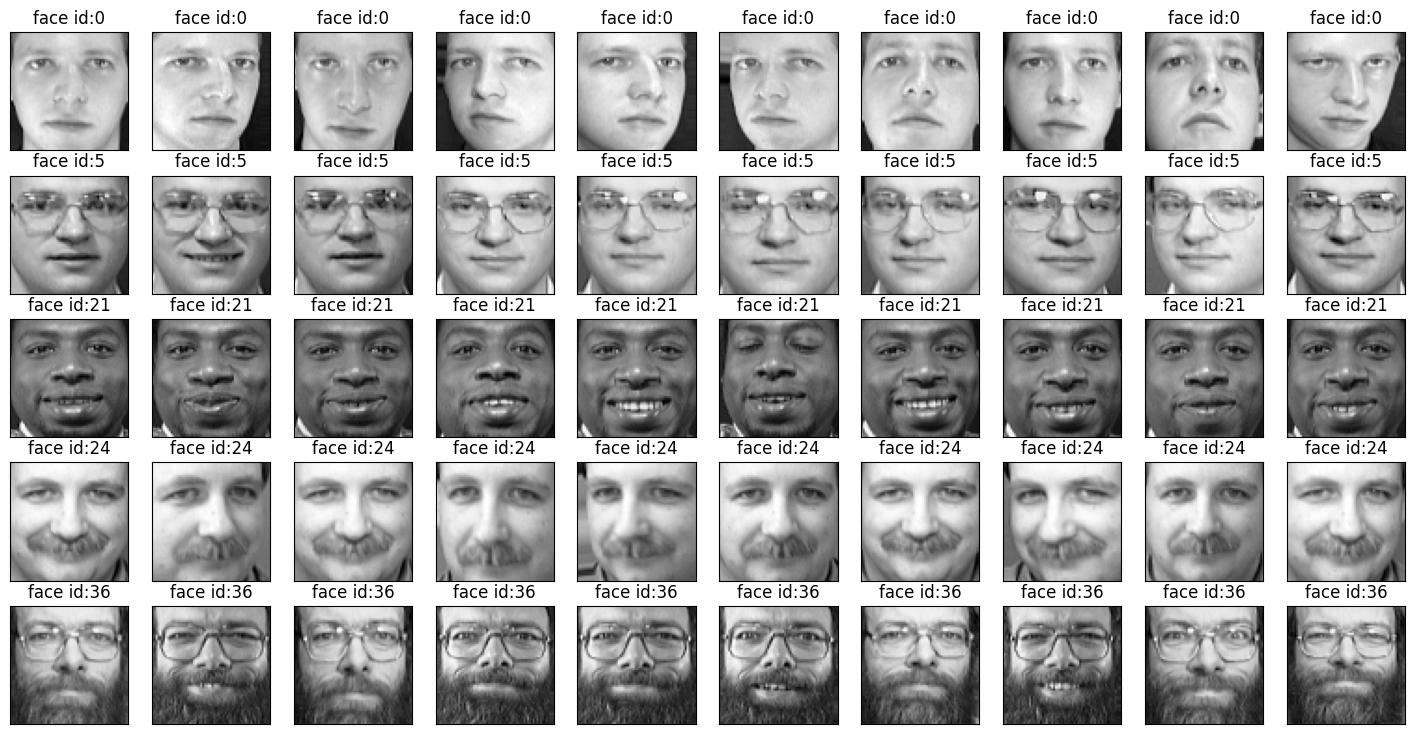

In [8]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=pics, subject_ids=[0,5, 21, 24, 36])

In [9]:
Xdata = pics # store images in Xdata
Ydata = labels.reshape(-1,1) # store labels in Ydata

## Split data for train and test purposes

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size = 0.2, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 64, 64)
x_test:  (80, 64, 64)
y_train:  (320, 1)
y_test:  (80, 1)


### Reshape

In [11]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 4096)
x_test:  (80, 4096)
y_train:  (320, 1)
y_test:  (80, 1)


In [12]:
from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
pca = PCA(n_components=100)  # Adjust the number of components as needed

# Fit PCA on training data and transform both training and test data
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Now x_train_pca and x_test_pca contain the extracted features

# Print the explained variance ratio to see how much variance is preserved
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.23519269 0.14391746 0.08136471 0.05145055 0.03539058 0.02983491
 0.02396469 0.02110779 0.02008528 0.01765788 0.01564836 0.01397462
 0.01280236 0.01120247 0.01058394 0.00959176 0.00941869 0.00863587
 0.00777993 0.00754094 0.00733944 0.00634058 0.00576772 0.00564391
 0.00548573 0.00538835 0.00525967 0.00509569 0.00488316 0.00444643
 0.00415698 0.00399891 0.00376385 0.00347037 0.00327235 0.00316445
 0.00304768 0.00293212 0.00289972 0.0027721  0.00264655 0.00261295
 0.00252461 0.00247653 0.00234715 0.00231678 0.00226755 0.00223166
 0.00214377 0.00209088 0.00200191 0.001962   0.00194951 0.00186898
 0.00182594 0.00177723 0.00175303 0.00171444 0.00169758 0.00164117
 0.00158069 0.00157074 0.00151362 0.00150401 0.00147535 0.0014297
 0.00139979 0.00135371 0.00134377 0.00131277 0.00129909 0.00125649
 0.00123915 0.00122097 0.00119329 0.00115617 0.00114891 0.00112799
 0.00110291 0.00110008 0.00108299 0.00104518 0.00103627 0.00101434
 0.00100691 0.00098218 0.00096872 0.0

In [13]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
LR_accuracy = round(lr.score(x_test, y_test)*100,2)

y_pred=lr.predict(x_test)

print("LR_accuracy is %", LR_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

list_names.append("Logistic Regression")
list_accuracy.append(LR_accuracy)

LR_accuracy is % 96.25
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      0.75      0.86         4
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         2
          20       0.50      1.00  

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

rf = RandomForestClassifier(n_estimators = 4000, random_state = 1)
rf.fit(x_train, y_train)
RF_accuracy = round(rf.score(x_test, y_test)*100,2)

y_pred = rf.predict(x_test)

print("RF_accuracy is %", RF_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
list_names.append("Random Forest")
list_accuracy.append(RF_accuracy)

RF_accuracy is % 95.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         2
          20       0.50      1.00   

# RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=4000, random_state=1)

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, x_train, y_train, cv=cv, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_accuracy = np.mean(cv_scores)
std_cv_accuracy = np.std(cv_scores)

# Print cross-validation results
print(f"Cross-validated Random Forest accuracy: {mean_cv_accuracy:.2f} ± {std_cv_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Append accuracy to the lists for comparison
list_names.append("Random Forest (CV)")
list_accuracy.append(mean_cv_accuracy)


Cross-validated Random Forest accuracy: 0.93 ± 0.02
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         2
      

# K-NN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(x_train, y_train)
Knn_accuracy = round(Knn.score(x_test, y_test)*100,2)

y_pred = Knn.predict(x_test)

print("Knn_accuracy is %", Knn_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
list_names.append("KNN")
list_accuracy.append(Knn_accuracy)

Knn_accuracy is % 91.25
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         2
           3       0.67      0.67      0.67         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       0.75      0.75      0.75         4
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         2
          20       0.50      1.00 

# SVM 

In [16]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define parameter distributions for RandomizedSearchCV, focusing on linear kernel
param_dist = {
    'C': uniform(0.1, 1000)
}

# Initialize RandomizedSearchCV with the SVM model and linear kernel
svm_random = RandomizedSearchCV(SVC(kernel='linear'), param_distributions=param_dist, n_iter=10, cv=2, scoring='accuracy', verbose=2, random_state=42)

# Fit the model to the training data
svm_random.fit(x_train, y_train.ravel())

# Display the best parameters found by RandomizedSearchCV
print("Best Parameters:", svm_random.best_params_)

# Use the best estimator to make predictions
svm_best = svm_random.best_estimator_

# Perform cross-validation on the training set
cross_val_scores = cross_val_score(svm_best, x_train, y_train.ravel(), cv=2, scoring='accuracy')

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END ................................C=374.6401188473625; total time=   0.2s
[CV] END ................................C=374.6401188473625; total time=   0.1s
[CV] END ................................C=950.8143064099162; total time=   0.1s
[CV] END ................................C=950.8143064099162; total time=   0.1s
[CV] END ................................C=732.0939418114051; total time=   0.1s
[CV] END ................................C=732.0939418114051; total time=   0.2s
[CV] END ................................C=598.7584841970366; total time=   0.2s
[CV] END ................................C=598.7584841970366; total time=   0.2s
[CV] END ...............................C=156.11864044243652; total time=   0.2s
[CV] END ...............................C=156.11864044243652; total time=   0.2s
[CV] END ...............................C=156.09452033620263; total time=   0.1s
[CV] END ...............................C=156.09

In [18]:

print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", np.mean(cross_val_scores))

# Predict on the test set
y_pred = svm_best.predict(x_test)

# Evaluate the model
print("Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

list_names.append("SVM")
list_accuracy.append(accuracy_score(y_test, y_pred))



Cross-validation scores: [0.90625 0.88125]
Mean cross-validation score: 0.89375
Model Evaluation:
Accuracy Score: 0.975
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00   

# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train Naive Bayes classifier
nb = GaussianNB(var_smoothing=1e-9)
nb.fit(x_train, y_train)

# Calculate accuracy
nb_accuracy = round(nb.score(x_test, y_test) * 100, 2)
print("Naive Bayes accuracy is %", nb_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Append accuracy to the lists for comparison
list_names.append("Naive Bayes")
list_accuracy.append(nb_accuracy)


Naive Bayes accuracy is % 87.5
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      0.75      0.86         4
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         2
          20       0.50    

# VotingClassifier

In [74]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Define base classifiers
log_reg = LogisticRegression(max_iter=1000, random_state=1)
dt = DecisionTreeClassifier(random_state=1)
svm = SVC(kernel='rbf', random_state=1)

# Initialize the Voting Classifier with different base classifiers
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('dt', dt), ('svm', svm)], voting='hard')

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(voting_clf, x_train, y_train, cv=cv, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_accuracy = np.mean(cv_scores)
std_cv_accuracy = np.std(cv_scores)

# Print cross-validation results
print(f"Cross-validated Voting Classifier accuracy: {mean_cv_accuracy:.2f} ± {std_cv_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Append accuracy to the lists for comparison
list_names.append("Voting Classifier (CV)")
list_accuracy.append(mean_cv_accuracy)


Cross-validated Voting Classifier accuracy: 0.93 ± 0.02
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         2
  

# Decision Tree classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=4000)
dt.fit(x_train, y_train)

# Calculate accuracy
dt_accuracy = round(dt.score(x_test, y_test) * 100, 2)
print("Decision Tree accuracy is %", dt_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Append accuracy to the lists for comparison
list_names.append("Decision Tree")
list_accuracy.append(dt_accuracy)


Decision Tree accuracy is % 55.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      0.75      0.86         4
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         2
          20       0.50  

# Comparison of the Learning Methods

In [27]:
df = pd.DataFrame({'METHOD': list_names, 'ACCURACY (%)': list_accuracy})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()

,METHOD,ACCURACY (%)
0,Random Forest (CV),0.915625
1,Random Forest (CV),0.928125
2,Decision Tree,55.000000
3,Decision Tree,60.000000
4,Naive Bayes,87.500000
